In [1]:
#Importing libraries
import pandas as pd
import os
import json
import csv
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
#Importing the generic functions created
import sys
sys.path.append('../src/utils/')
from eda import calculate_mode, plot_attribute_counts_bad_rate_count_type

In [3]:
bad_officer_appointments = '../data/bad_officer_appointments.csv'
good_officer_appointments = '../data/good_officer_appointments.csv'
officer_information_directory = '../data/officer_attribute_store/'

In [4]:
def extract_officer_address_data(csv_file_path, json_directory, appointment_type):
    bad_officer_appointments = pd.read_csv(csv_file_path)

    unique_officer_numbers = bad_officer_appointments['officer_number'].unique()
    matched_officer_data = []

    for officer_number in unique_officer_numbers:
        json_file_path = os.path.join(json_directory, officer_number + '.json')

        if not os.path.isfile(json_file_path):
            continue

        with open(json_file_path, 'r') as file:
            json_data = json.load(file)

        if 'address' in json_data and appointment_type in json_data['address']:
            other_addresses = json_data['address'][appointment_type]

            for company_number, addresses_list in other_addresses.items():
                for address_info in addresses_list:
                    latitude = address_info.get('latitude')
                    longitude = address_info.get('longitude')
                    address_type = address_info.get('address_type')
                    postcode = address_info.get('postcode')
                    county = address_info.get('county')
                    country = address_info.get('country')
                    full_address = address_info.get('full_address')
                    
                    matched_officer_data.append((
                        officer_number,
                        company_number,
                        latitude,
                        longitude,
                        address_type,
                        postcode,
                        county,
                        country,
                        full_address
                    ))

    return pd.DataFrame(matched_officer_data, columns=['officer_number', 'company_number', 'latitude', 'longitude', 'address_type', 'postcode', 'county', 'country', 'full_address'])


In [5]:
good_officer_company_address_data_other = extract_officer_address_data(good_officer_appointments,officer_information_directory, 'other')
bad_officer_company_address_data_other = extract_officer_address_data(bad_officer_appointments,officer_information_directory, 'other')


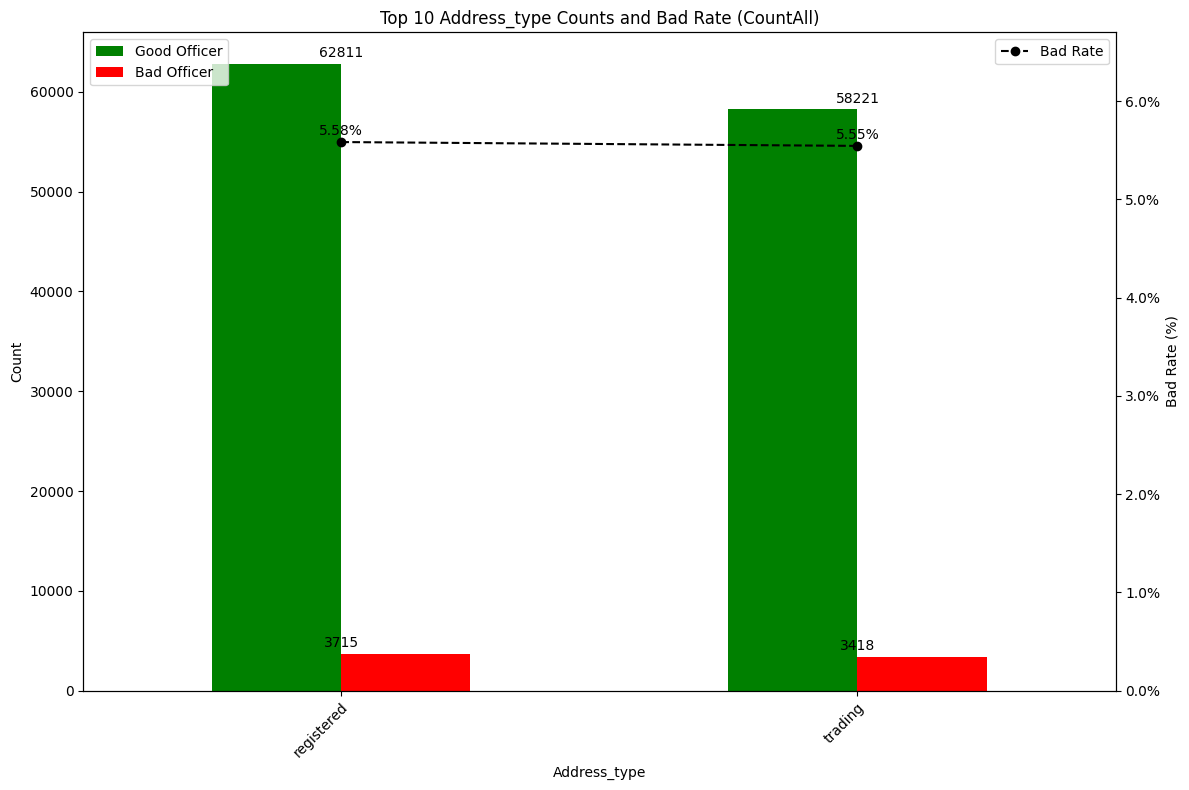

In [6]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_address_data_other, bad_officer_company_address_data_other, 'address_type', count_type='count_all')


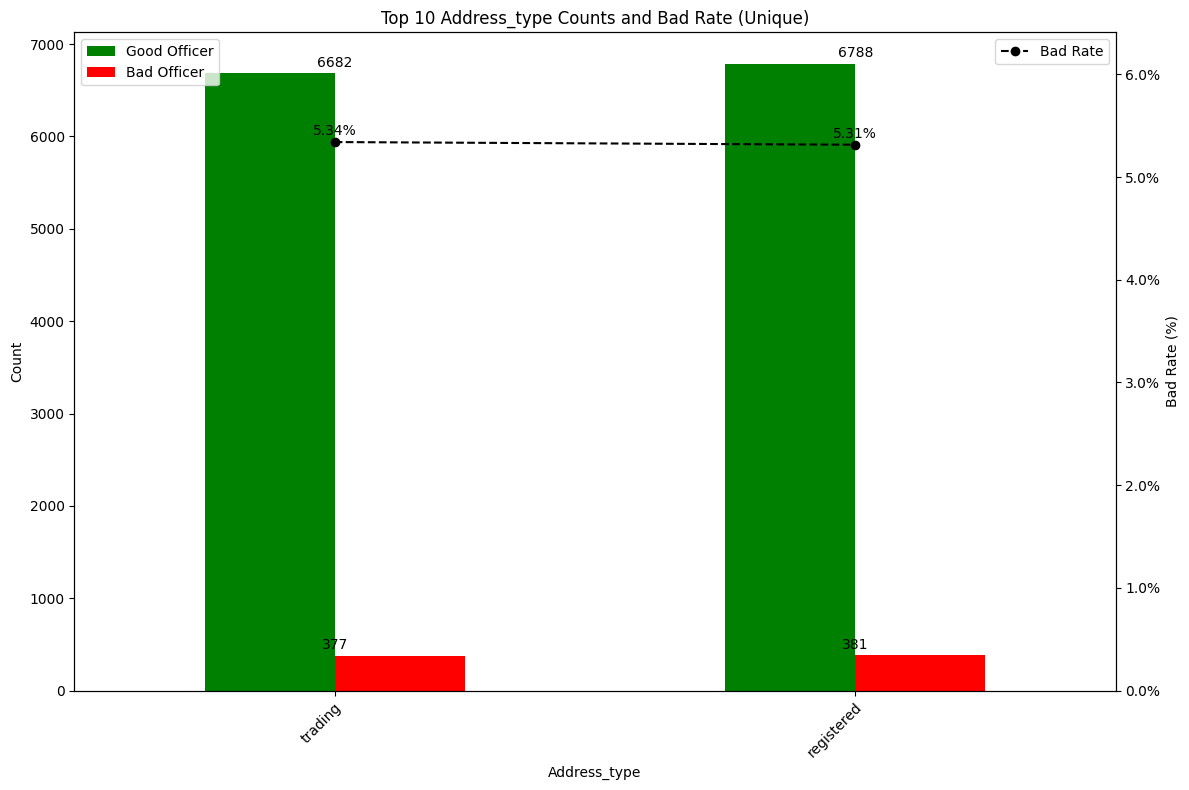

In [7]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_address_data_other, bad_officer_company_address_data_other, 'address_type', count_type='unique')


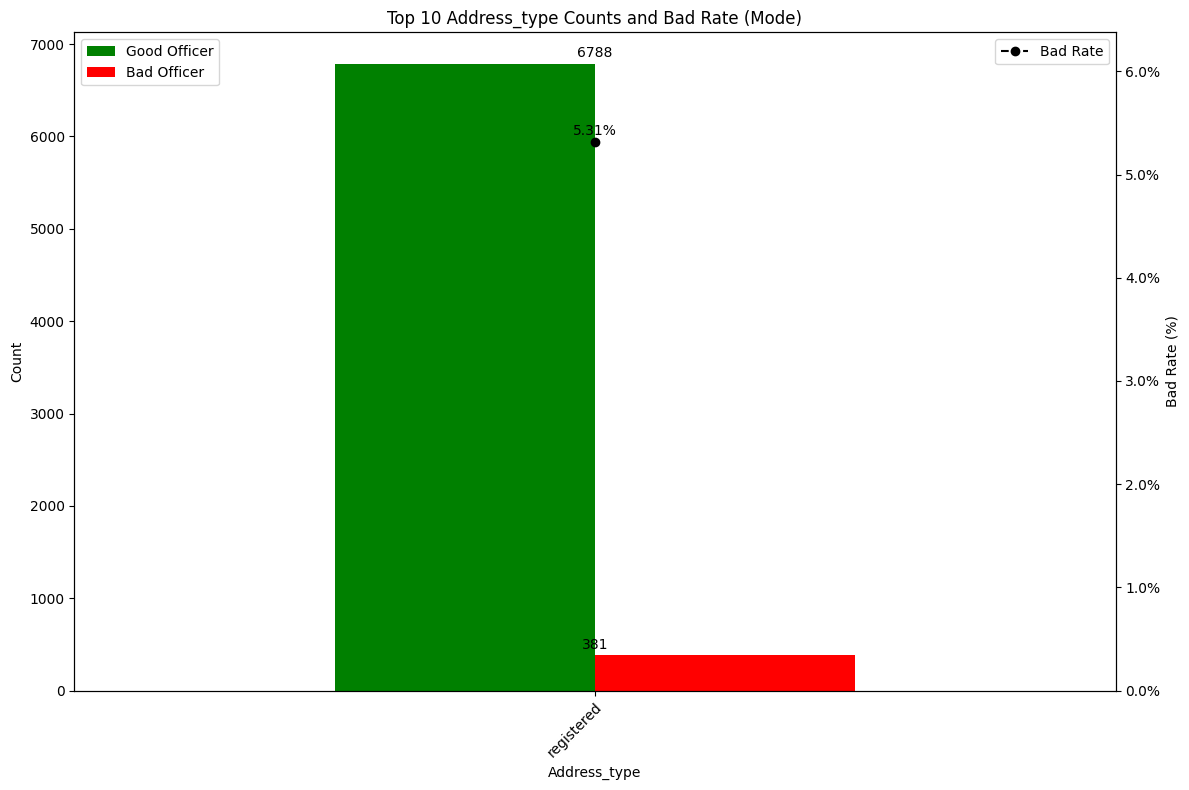

In [8]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_address_data_other, bad_officer_company_address_data_other, 'address_type', count_type='mode')


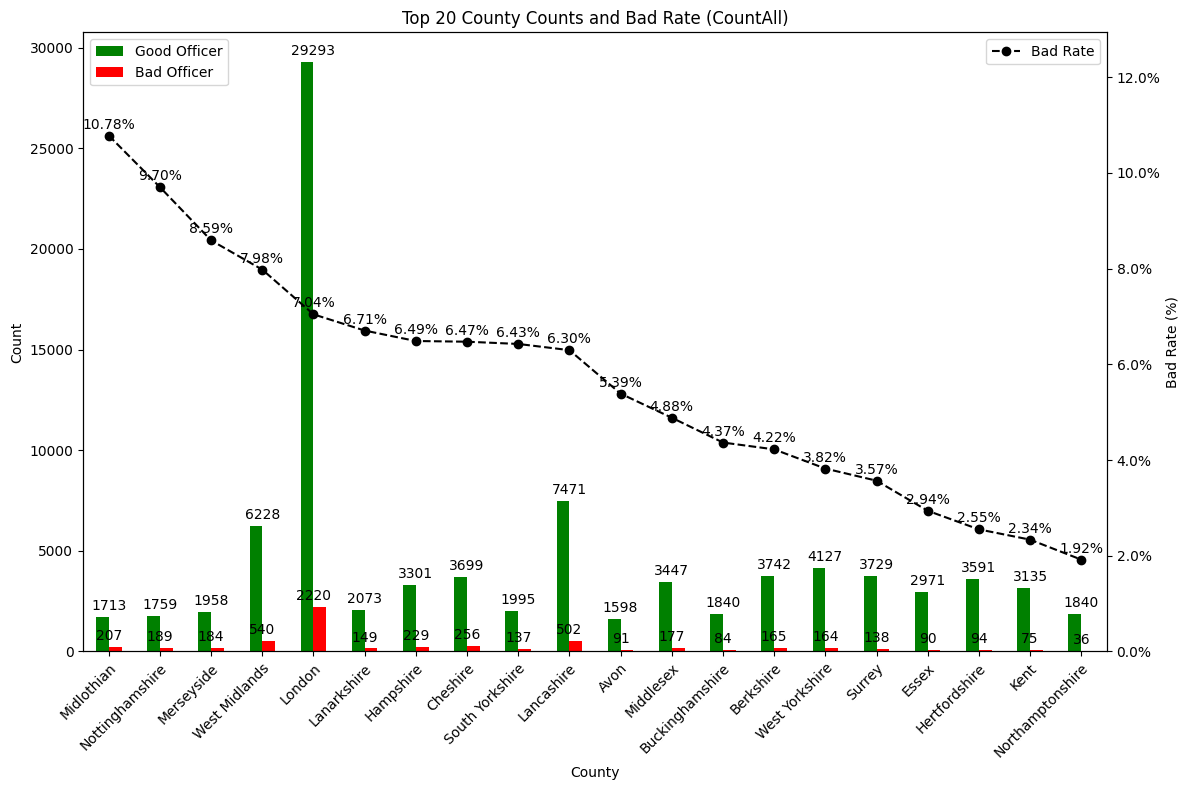

In [18]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_address_data_other, bad_officer_company_address_data_other, 'county', count_type='count_all', top_num_values=20)


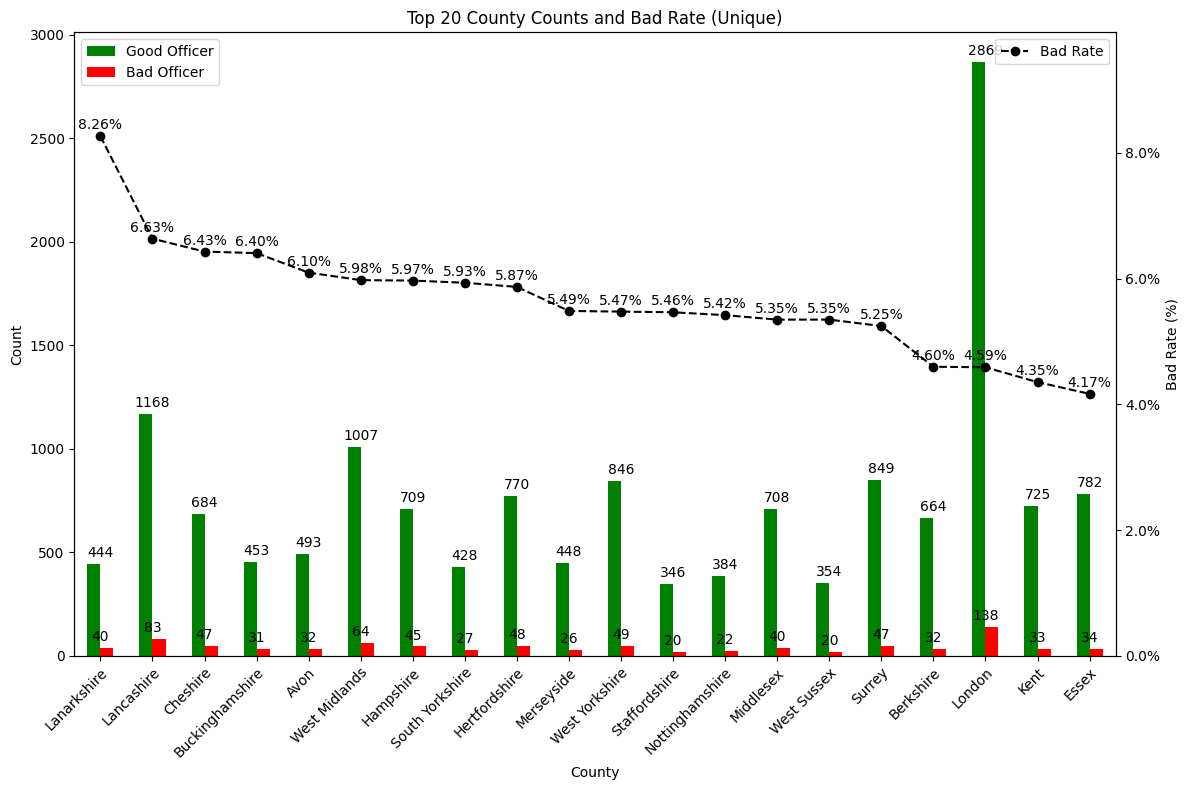

In [7]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_address_data_other, bad_officer_company_address_data_other, 'county', count_type='unique', top_num_values=20)


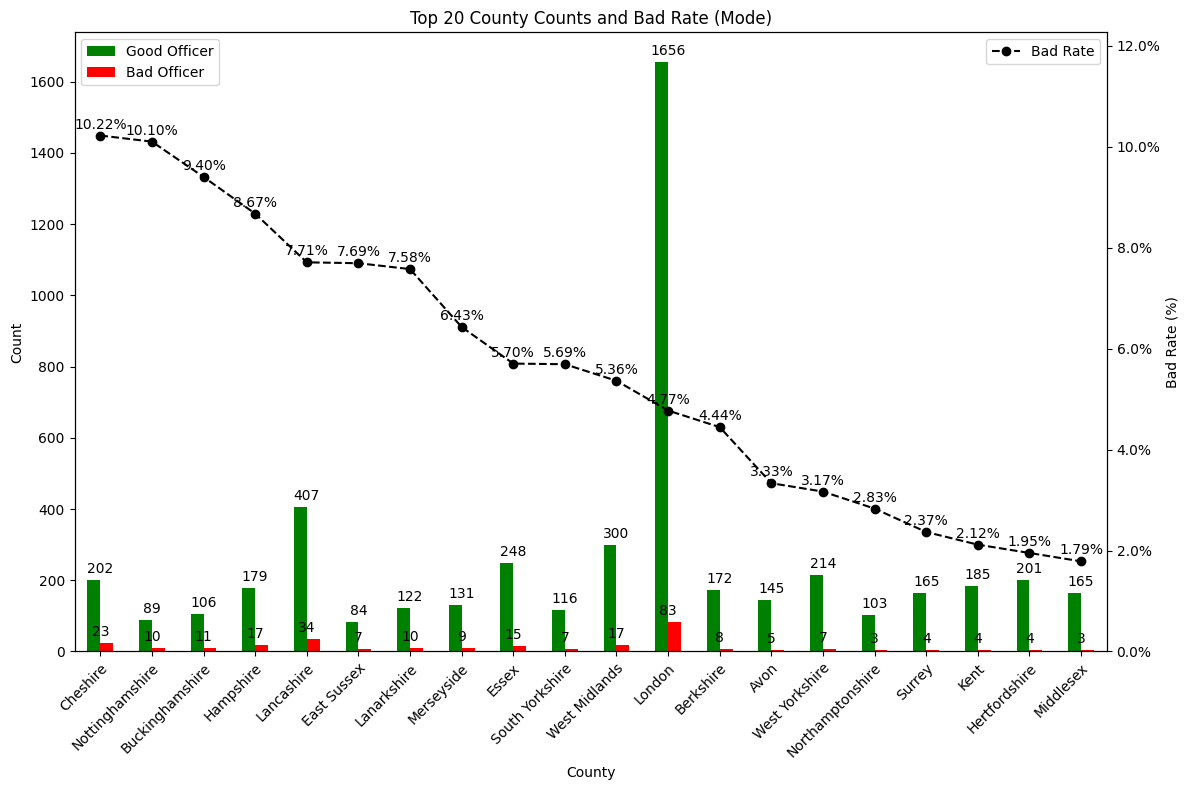

In [8]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_address_data_other, bad_officer_company_address_data_other, 'county', count_type='mode', top_num_values=20)


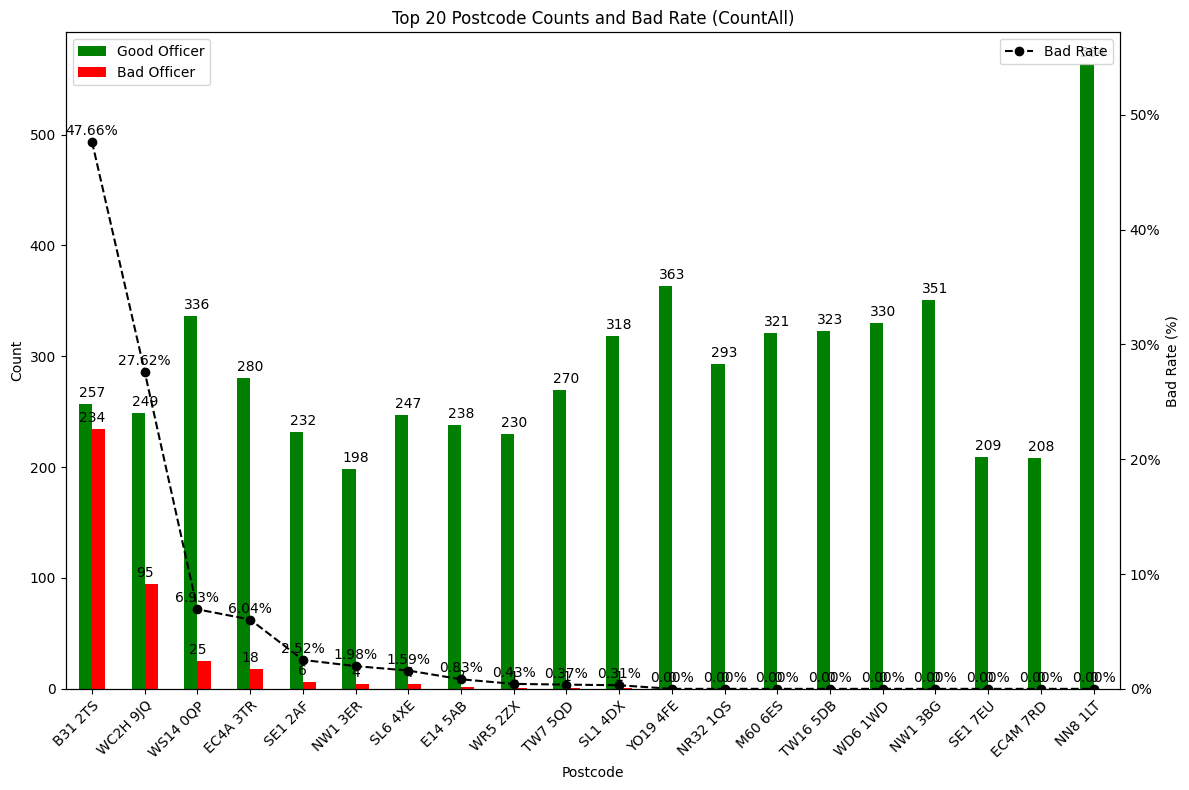

In [9]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_address_data_other, bad_officer_company_address_data_other, 'postcode', count_type='count_all', top_num_values=20)


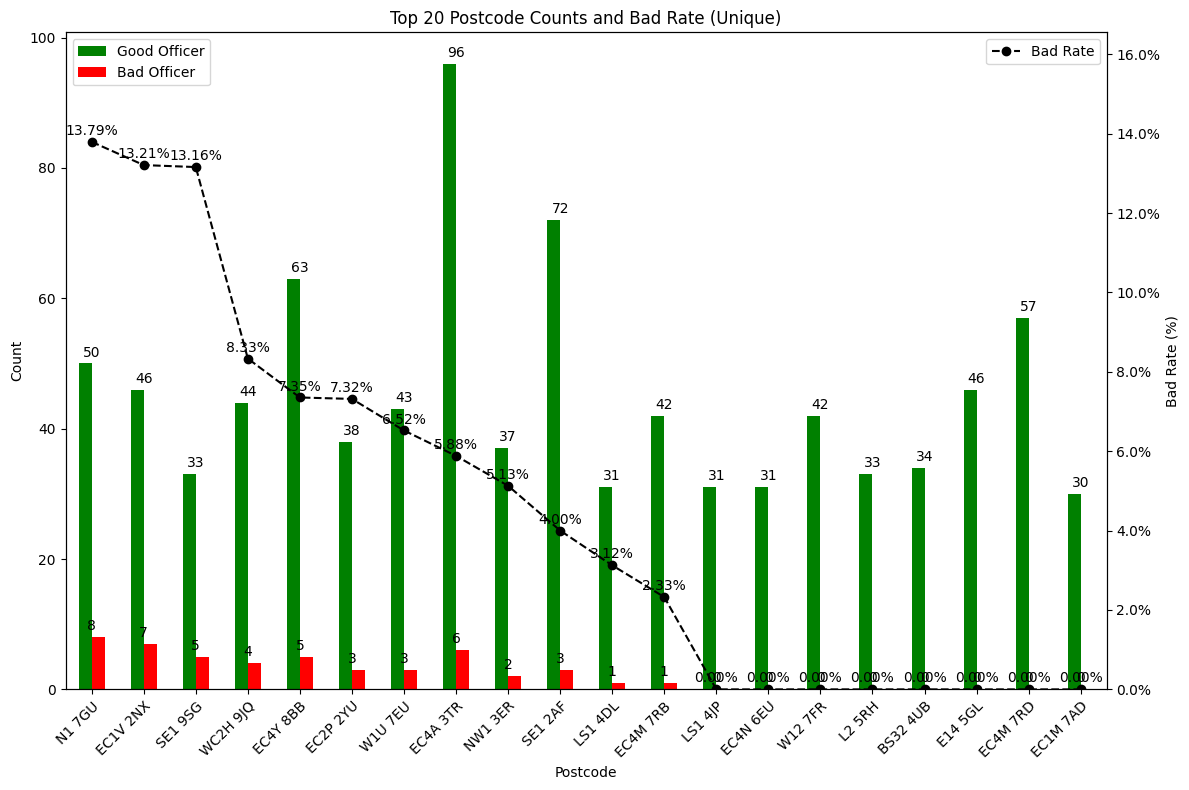

In [10]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_address_data_other, bad_officer_company_address_data_other, 'postcode', count_type='unique',top_num_values=20)


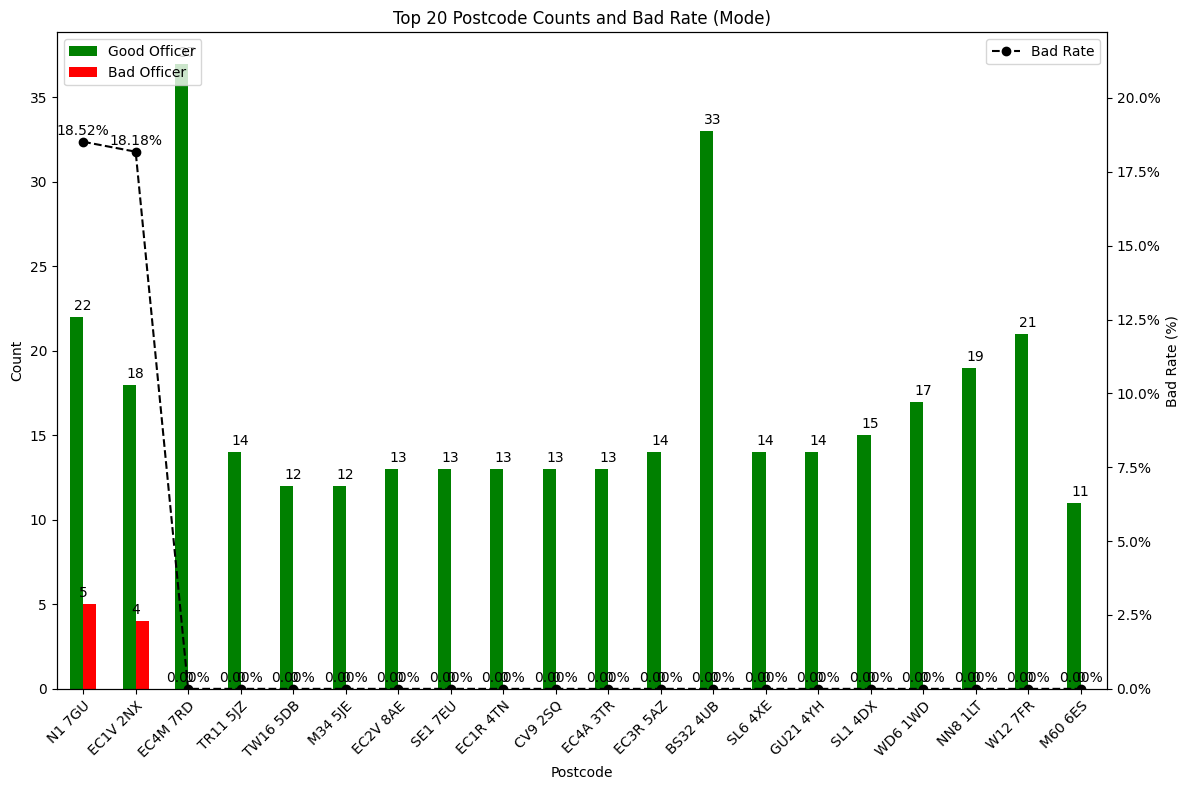

In [11]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_address_data_other, bad_officer_company_address_data_other, 'postcode', count_type='mode', top_num_values=20)


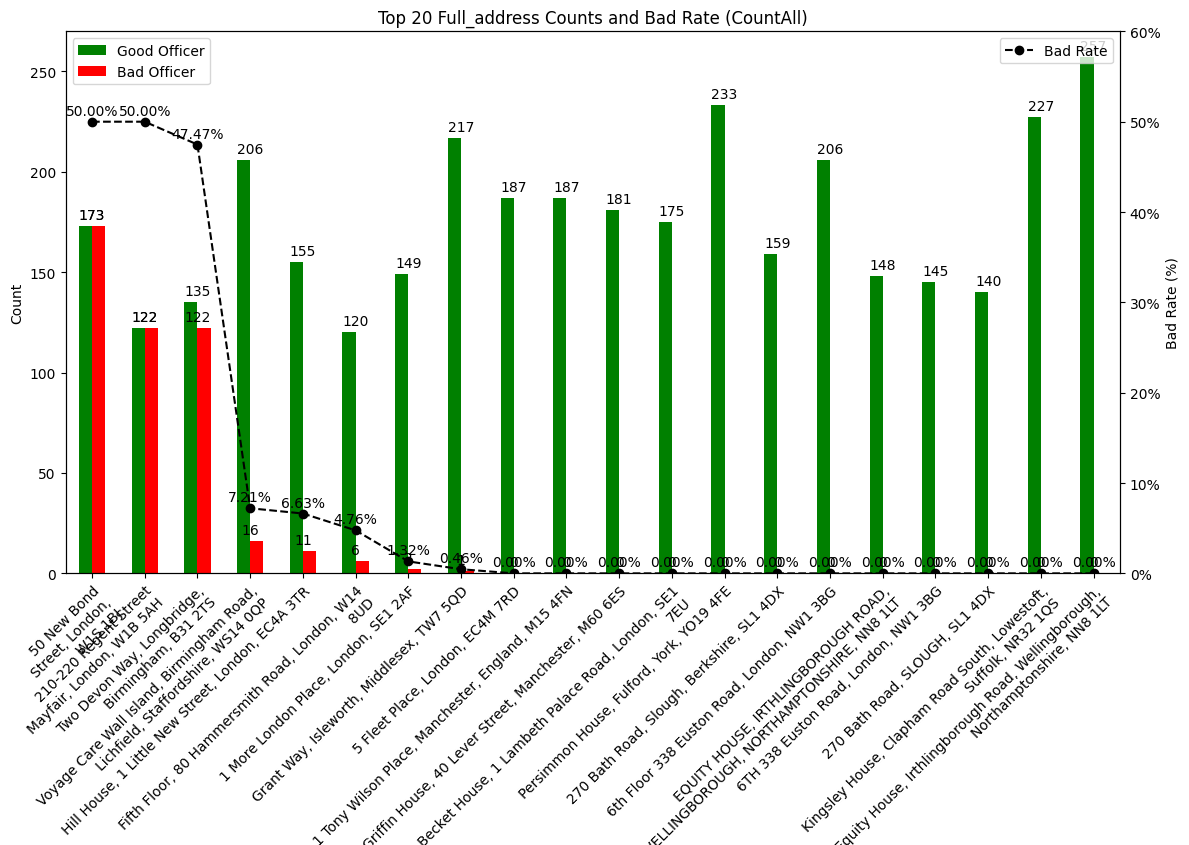

In [12]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_address_data_other, bad_officer_company_address_data_other, 'full_address', count_type='count_all', top_num_values=20)


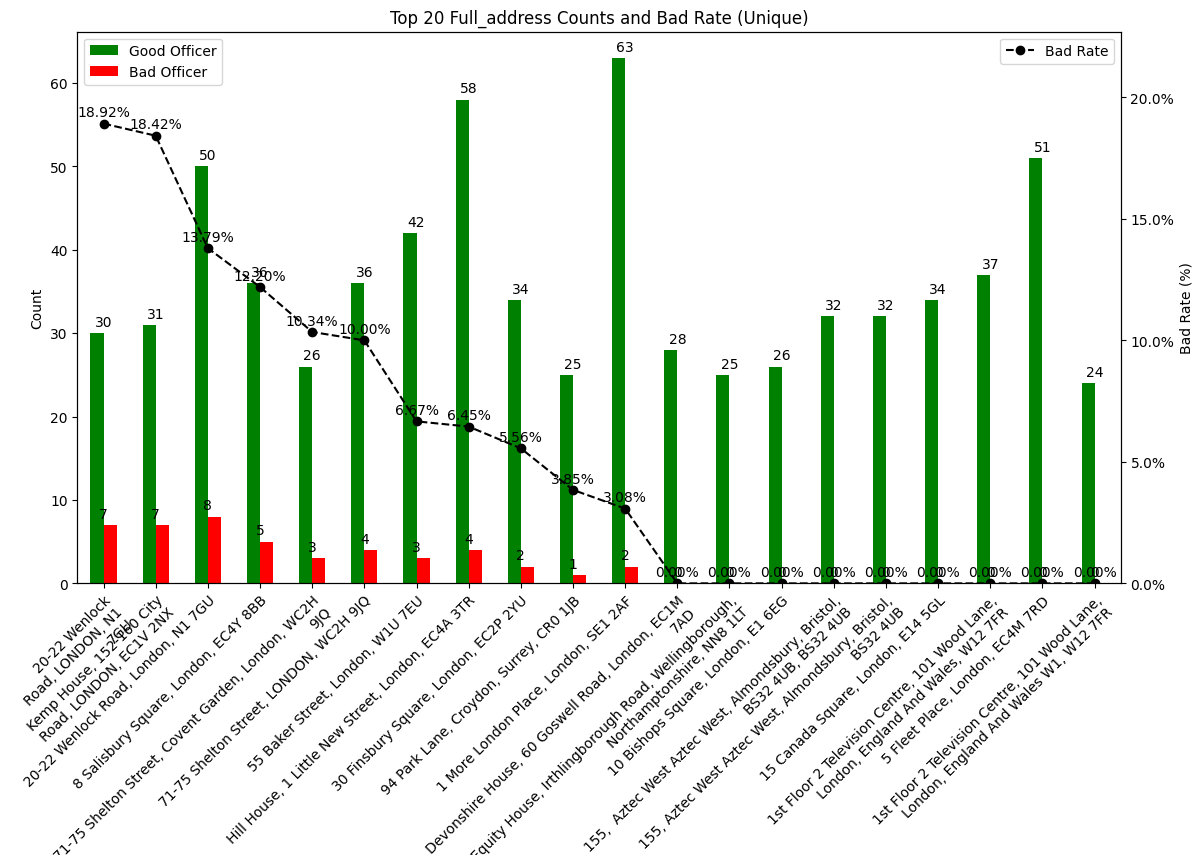

In [13]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_address_data_other, bad_officer_company_address_data_other, 'full_address', count_type='unique', top_num_values=20)


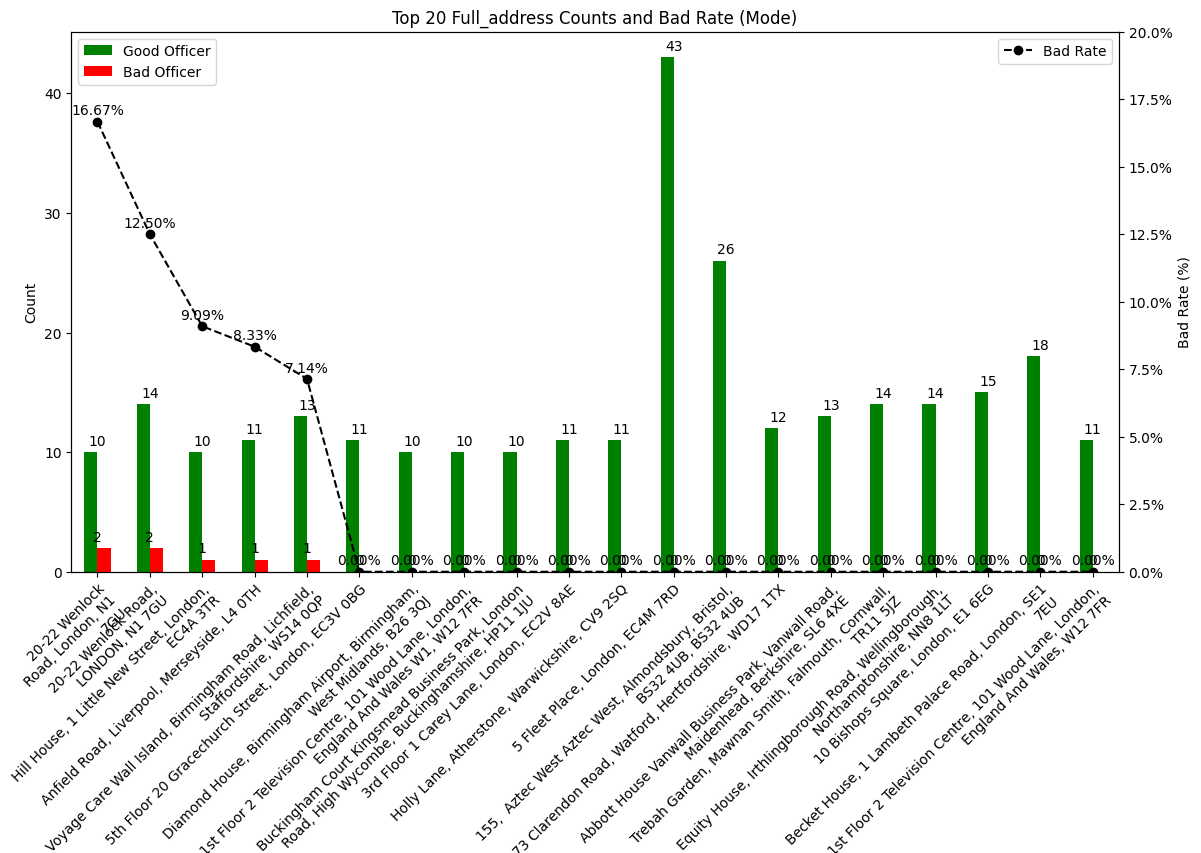

In [14]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_address_data_other, bad_officer_company_address_data_other, 'full_address', count_type='mode', top_num_values=20)


In [15]:
def plot_scatter_map(good_officers_df, bad_officers_df):
    plt.figure(figsize=(10, 6))

    min_longitude = min(good_officers_df['longitude'].min(), bad_officers_df['longitude'].min())
    max_longitude = max(good_officers_df['longitude'].max(), bad_officers_df['longitude'].max())
    min_latitude = min(good_officers_df['latitude'].min(), bad_officers_df['latitude'].min())
    max_latitude = min(good_officers_df['latitude'].max(), bad_officers_df['latitude'].max())

    plt.scatter(good_officers_df['longitude'], good_officers_df['latitude'], color='green', label='Good')
    plt.scatter(bad_officers_df['longitude'], bad_officers_df['latitude'], color='red', label='Bad')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Scatter Map of Good and Bad Officers')
    plt.legend()
    plt.grid(True)
    plt.xlim(min_longitude - 0.1, max_longitude + 0.1)
    plt.ylim(min_latitude - 0.1, max_latitude + 0.1)

    plt.show()


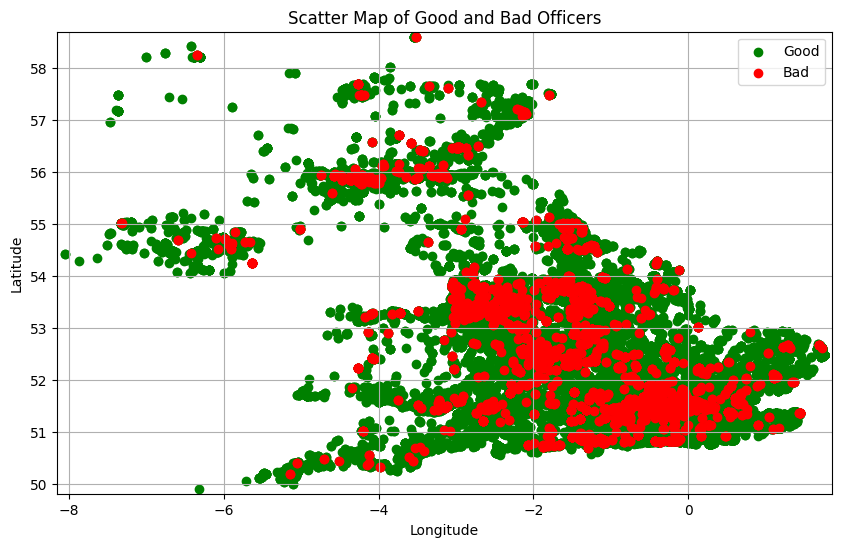

In [19]:
plot_scatter_map(good_officer_company_address_data_other, bad_officer_company_address_data_other)